In [1]:
from dotenv import load_dotenv
load_dotenv()  # loads your API key (under var "OPENAI_API_KEY")
import os
import eda_tool



In [2]:
eda = eda_tool.EDA('data/breast_cancer.csv')

/Users/nima/Documents/School/CMPT 419 - Nick/AutoEDA/venv/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### Data Summary

The dataset contains 569 rows and 33 columns. It includes various features related to breast cancer diagnosis, with the 'diagnosis' column indicating two unique values ('B' for benign and 'M' for malignant). The dataset has no missing values, except for the 'Unnamed: 32' column, which contains only NaN values for all entries. The numerical features include metrics such as mean radius, texture, perimeter, area, and various statistical properties (e.g., mean, standard error, worst) with varying ranges and distributions.

### Suggested Plots

- plot_box(x='diagnosis', y='area_mean', title='Box Plot of Area Mean by Diagnosis')

- plot_scatter(x='radius_mean', y='area_mean', hue='diagnosis', title='Scatter Plot of Area Mean vs. Radius Mean')

- plot_histogram(column='texture_mean', bins=20, title='Histogram of Texture Mean')

- plot_violin(x='diagnosis', y='concavity_mean', title='Violin Plot of Concavity Mean by Diagnosis')

- plot_heatmap(title='Heatmap of Correlation Matrix')

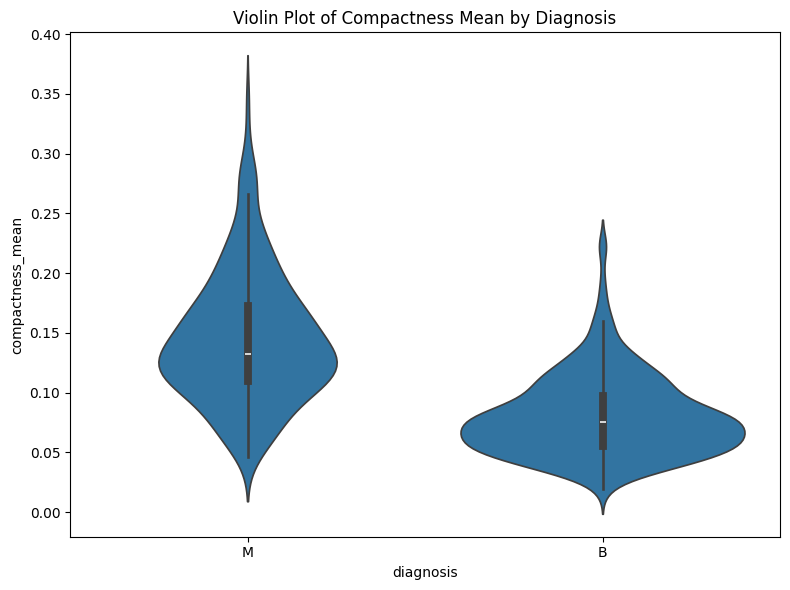

---

### LLM Analysis & Suggestion

# Analysis

The violin plot titled "Violin Plot of Compactness Mean by Diagnosis" presents the distribution of the `compactness_mean` variable across two categories of the `diagnosis` variable: 'M' (Malignant) and 'B' (Benign). 

### Observed Patterns:
1. **Distribution Shape**: 
   - The plot shows that the distribution of `compactness_mean` for malignant cases ('M') is wider and has a higher density in the range of 0.10 to 0.25 compared to benign cases ('B'), which are more concentrated around 0.05 to 0.15.
   
2. **Central Tendency**: 
   - The median (`compactness_mean`) for malignant cases appears to be higher than that for benign cases, suggesting that malignant cases have a generally higher compactness mean.

3. **Variability**: 
   - The range and interquartile range (IQR) of `compactness_mean` in malignant cases are also broader compared to benign cases, indicating more variability in compactness among malignant tumors.

4. **Potential Overlap**: 
   - While there is a clear distinction, some overlap exists at lower values of `compactness_mean`, particularly for benign cases, which might indicate that some benign tumors can have compactness values that are close to those of malignant tumors.

# Suggestions

To further analyze and visualize the data, the following steps are recommended:

1. **Box Plot for Detailed Summary**: Generate a box plot to provide insights into the quartiles and potential outliers in the data. This can help to summarize the central tendency and spread more succinctly.
   - **Function Call**: 
     ```python
     plot_box(x='diagnosis', y='compactness_mean', title='Box Plot of Compactness Mean by Diagnosis')
     ```

2. **Scatter Plot for Individual Data Points**: Create a scatter plot to visualize individual data points, which can help identify any potential outliers and observe the distribution more granularly.
   - **Function Call**: 
     ```python
     plot_scatter(x='diagnosis', y='compactness_mean', title='Scatter Plot of Compactness Mean by Diagnosis')
     ```

3. **Further Data Transformation**: Consider scaling the `compactness_mean` data to a common range or applying log transformation if the data is highly skewed, as this might improve the interpretability of any subsequent analyses.
   - **Function Call for Scaling**:
     ```python
     scale_data(columns=['compactness_mean'], method='minmax', title='Data Scaling for Compactness Mean')
     ```

These additional visualizations and transformations can provide deeper insights into the data and enhance the overall analysis.

In [3]:
eda.plot_violin(x='diagnosis', y='compactness_mean', title='Violin Plot of Compactness Mean by Diagnosis')


In [4]:
eda.scale_data(columns=['compactness_mean'], method='minmax', title='Data Scaling for Compactness Mean')


---

### LLM Analysis & Suggestion

# Analysis

The transformation applied to the `compactness_mean` column using the Min-Max scaling method has successfully normalized the data to a range between 0 and 1. Here are some insights regarding the changes observed:

### Applied Changes:
1. **Normalization**: The original values of `compactness_mean`, which ranged from approximately 0.07864 to 0.2839, have been transformed into a new scale where the minimum value is 0 and the maximum value is 1. This allows for easier comparison across different scales or features.

2. **Value Distribution**: The scaled values indicate that the original values have been repositioned within a consistent range. For instance, the original value of 0.2776 has been scaled to approximately 0.792, indicating it's near the upper end of the original distribution. Similarly, lower values have also been adjusted proportionately.

3. **Interpretability**: The scaling process enhances interpretability when comparing `compactness_mean` with other features that may have different ranges. This is particularly useful in machine learning algorithms that are sensitive to the scale of input features, such as gradient descent-based methods.

4. **Data Maintenance**: The transformation retains the relative differences between the values in the dataset. Thus, the underlying patterns and relationships in the data should still be preserved post-scaling.

# Suggestions

To further enhance the analysis and ensure that the data is optimally prepared for modeling or visualization, consider the following steps:

1. **Box Plot for Visual Inspection**: After scaling, create a box plot to visually inspect the distribution of the scaled values. This will help identify any potential outliers in the normalized data.
   - **Function Call**: 
     ```python
     plot_box(x='diagnosis', y='compactness_mean', title='Box Plot of Scaled Compactness Mean by Diagnosis')
     ```

2. **Histogram for Distribution Analysis**: Generate a histogram of the scaled `compactness_mean` to analyze the distribution and frequency of the newly transformed values, which can help identify any skewness or potential issues.
   - **Function Call**: 
     ```python
     plot_histogram(column='compactness_mean', bins=20, title='Histogram of Scaled Compactness Mean')
     ```

3. **Consider Log Transformation**: If the data remains skewed even after scaling, applying a log transformation could help in achieving a more normal distribution. This might be useful for further statistical analysis or modeling.
   - **Function Call**: 
     ```python
     log_transform(column='compactness_mean', title='Log Transformation of Compactness Mean')
     ```

These steps will provide deeper insights into the effects of the transformation on the data and facilitate better modeling and analysis moving forward.

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.792037,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.181768,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.431017,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.811361,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.347893,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.296055,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.257714,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.254340,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.790197,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


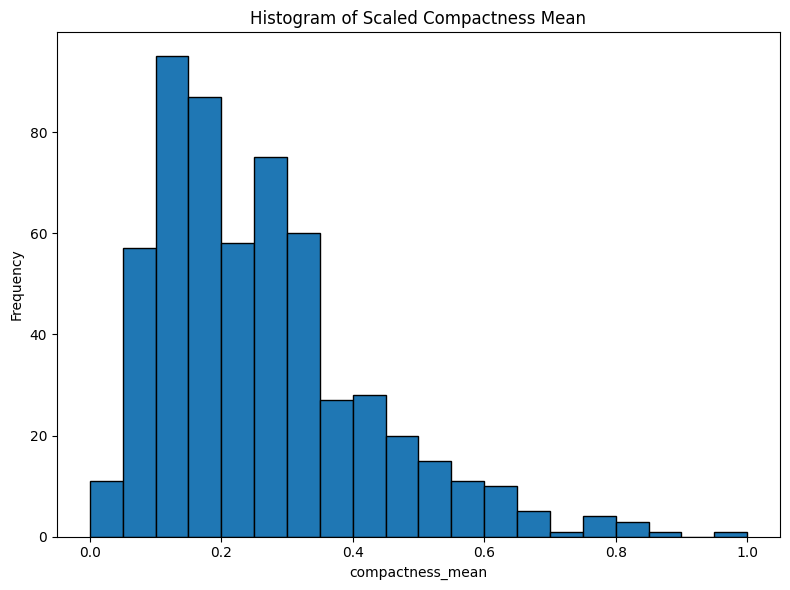

---

### LLM Analysis & Suggestion

# Analysis
The histogram of the scaled `compactness_mean` reveals a clear distribution pattern. The key observations include:

- **Right-skewed Distribution**: The majority of the data points cluster towards the lower end (near 0.0), indicating a right-skewed distribution. This suggests that many observations have lower compactness values, with fewer observations at higher compactness levels.
  
- **Peak Frequency**: The highest frequency of observations occurs in the range of approximately 0.1 to 0.3, indicating that most data points fall within this range.

- **Sparse Upper Range**: There are significantly fewer instances of compactness values as we approach the upper limits (0.6 to 1.0), suggesting that higher compactness is less common among the samples.

- **Potential Outliers**: The absence of observations in the upper range might indicate the presence of outliers or a natural limit to the compactness values in this dataset.

# Suggestions
To gain deeper insights into the data, consider the following visualizations and transformations:

1. **Violin Plot**: A violin plot can provide a richer understanding of the distribution, including probability density, and can highlight multimodal distributions if they exist.
   ```python
   plot_violin(x='compactness_mean', title='Violin Plot of Compactness Mean')
   ```

2. **Box Plot**: A box plot can help identify potential outliers and give a summary of the data's quartiles.
   ```python
   plot_box(x='compactness_mean', title='Box Plot of Compactness Mean')
   ```

3. **Log Transformation**: Since the distribution is right-skewed, applying a log transformation may help normalize the data, making it easier to interpret.
   ```python
   log_transform(column='compactness_mean', title='Log Transformation of Compactness Mean')
   ```

4. **Binning Continuous Variable**: If more interpretability is desired, binning the `compactness_mean` could simplify the analysis by categorizing the continuous variable.
   ```python
   bin_continuous(column='compactness_mean', bins=5, title='Binning Compactness Mean')
   ```

These steps can enhance the understanding of the variable and inform further analysis or model building.

In [5]:
eda.plot_histogram(column='compactness_mean', bins=20, title='Histogram of Scaled Compactness Mean')


In [7]:
eda.plot_box(x='compactness_mean', title='Box Plot of Compactness Mean')



TypeError: EDA.plot_box() missing 1 required positional argument: 'y'